In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [35]:
print(df.head())
print(df.cntry.unique())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH   5.0     6    3.0      3.0     10.0     5.0    8.0      5.0     4.0   
1    CH  25.0     6    6.0      5.0      7.0     5.0    9.0      3.0     2.0   
2    CH  26.0     6    1.0      8.0      8.0     8.0    7.0      6.0     3.0   
3    CH  28.0     6    4.0      6.0      6.0     7.0   10.0      6.0     2.0   
4    CH  29.0     6    5.0      6.0      7.0     5.0    8.0      7.0     2.0   

   gndr  agea  partner  
0   2.0  60.0      1.0  
1   2.0  59.0      1.0  
2   1.0  24.0      2.0  
3   2.0  64.0      1.0  
4   2.0  55.0      1.0  
['CH' 'CZ' 'DE' 'ES' 'NO' 'SE']


In [36]:
features = pd.get_dummies(df['cntry'])

features['Nordic'] = np.where((df['cntry'].isin(['NO', 'SE'])), 1, 0)

print(pd.crosstab(features['Nordic'], df['cntry']))

cntry     CH    CZ  DE    ES    NO    SE
Nordic                                  
0       1546  1316  28  2426     0     0
1          0     0   0     0  1462  1816


In [37]:
features['Adult_65plus'] = np.where(df['agea']>=65, 1, 0)

print(df['agea'].groupby(features['Adult_65plus']).describe().stack())

Adult_65plus       
0             count    6682.000000
              mean       40.874738
              std        13.958596
              min        15.000000
              25%        29.000000
              50%        42.000000
              75%        53.000000
              max        64.000000
1             count    1673.000000
              mean       73.815302
              std         6.650086
              min        65.000000
              25%        69.000000
              50%        72.000000
              75%        78.000000
              max       114.000000
dtype: float64


In [38]:
list(df)

['cntry',
 'idno',
 'year',
 'tvtot',
 'ppltrst',
 'pplfair',
 'pplhlp',
 'happy',
 'sclmeet',
 'sclact',
 'gndr',
 'agea',
 'partner']

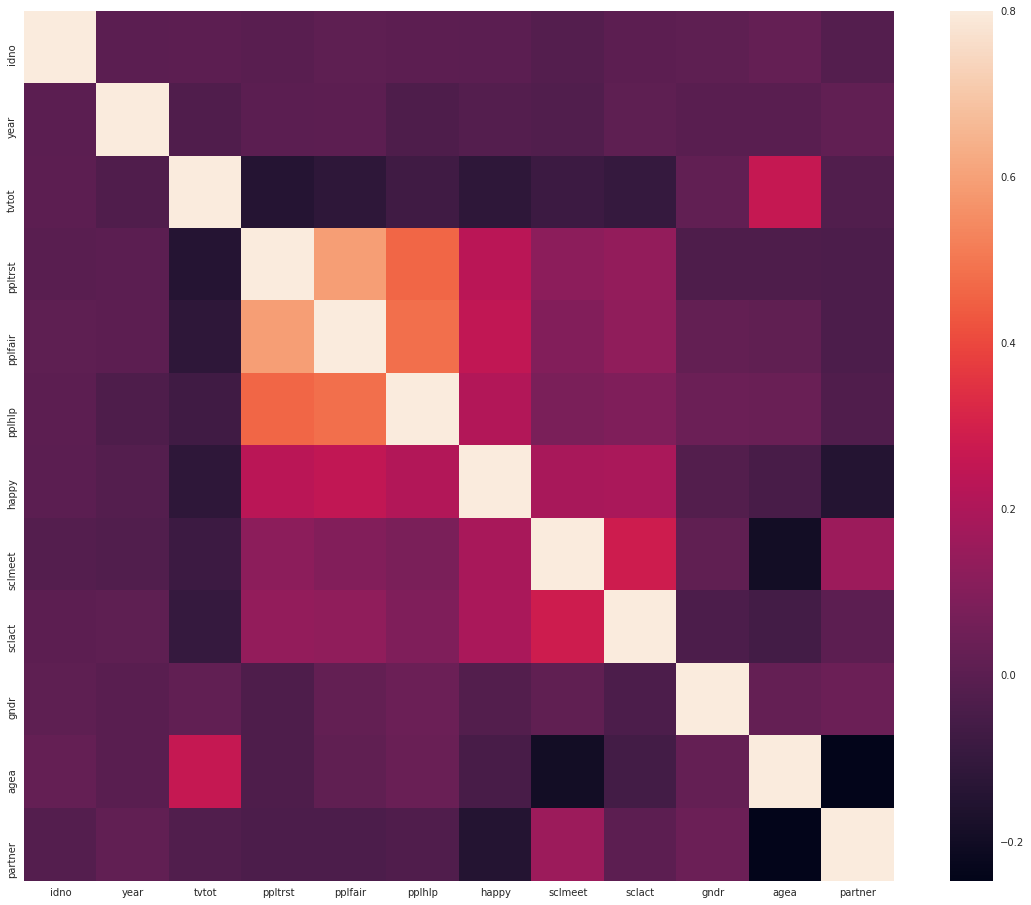

                  ppltrst   pplfair    pplhlp  trust_fair_help
ppltrst          1.000000  0.592001  0.462562         0.834209
pplfair          0.592001  1.000000  0.480918         0.841674
pplhlp           0.462562  0.480918  1.000000         0.789318
trust_fair_help  0.834209  0.841674  0.789318         1.000000


In [39]:
corrmat = df.corr()
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(20,16))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

means = df[['ppltrst','pplfair','pplhlp']].mean(axis=0)
stds = df[['ppltrst', 'pplfair','pplhlp']].std(axis=0)
features['trust_fair_help'] = ((df[['ppltrst','pplfair','pplhlp']] - means) /stds).mean(axis=1)

plotdf = df.loc[:, ['ppltrst','pplfair','pplhlp']]
plotdf['trust_fair_help'] = features['trust_fair_help']
corrmat2 = plotdf.corr()

print(corrmat2)

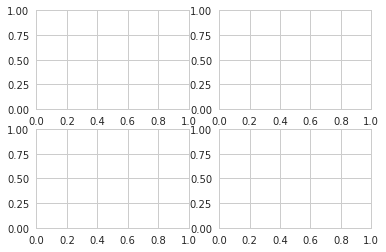

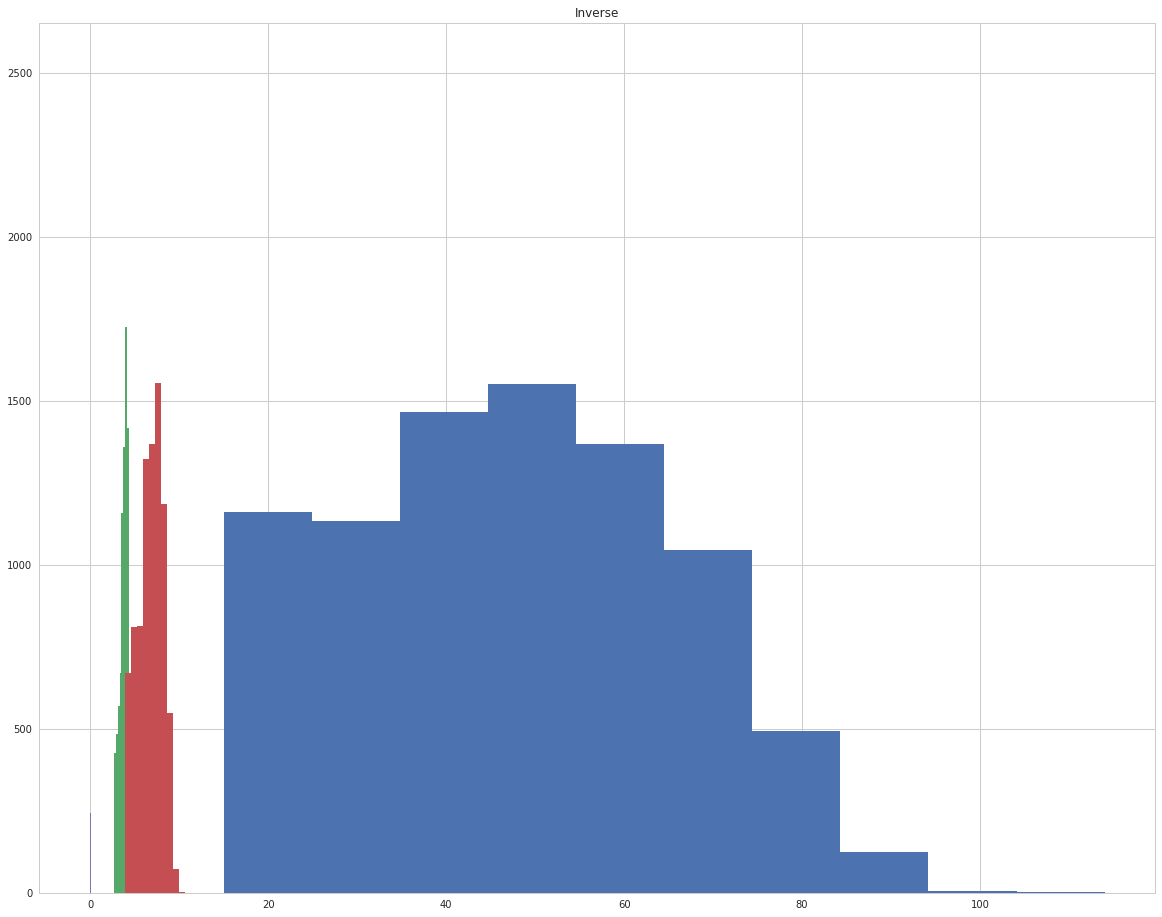

In [43]:
fig = plt.figure()
f, ax = plt.subplots(figsize=(20,16))

fig.add_subplot(221)
plt.hist(df['agea'].dropna())
plt.title('Raw')

fig.add_subplot(222)
plt.hist(np.log(df['agea'].dropna()))
plt.title('Log')

fig.add_subplot(223)
plt.hist(np.sqrt(df['agea'].dropna()))
plt.title('Square root')

ax3=fig.add_subplot(224)
plt.hist(1/df['agea'].dropna())
plt.title('Inverse')
plt.show()

In [41]:
features['log_age'] = np.log(df['agea'].dropna())

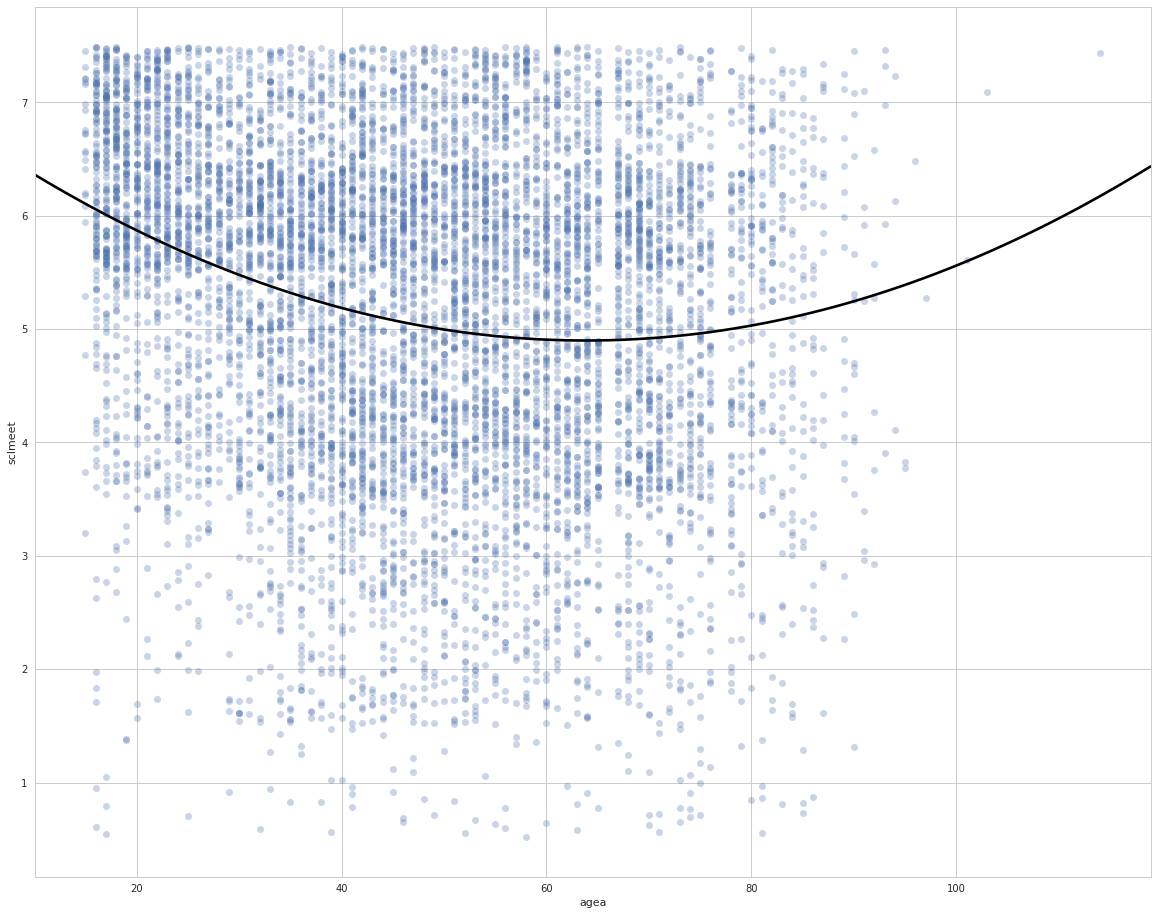

In [44]:
f, ax = plt.subplots(figsize=(20,16))
sns.regplot(
    df['agea'],
    y=df['sclmeet'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':.3},
    line_kws={'color':'black'},
              ci=None
)
plt.show()